In [20]:
#定義
alpha=2
def t_cost(s,t): return ((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5)
def d_cost(s,t): return (1/alpha)*(((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5))

In [21]:
def tpath_pathcost(start,end,tpath):
    pathcost=0
    a=tpath.index(start)
    b=tpath.index(end)
    if a<b:
        for i in range(a,b):
            pathcost=pathcost+t_cost(V[tpath[i]],V[tpath[(i+1)%len(tpath)]])
    if a>b:
        for i in range(a,len(tpath)):
            pathcost=pathcost+t_cost(V[tpath[i]],V[tpath[(i+1)%len(tpath)]])
        for i in range(b):
            pathcost=pathcost+t_cost(V[tpath[i]],V[tpath[(i+1)%len(tpath)]])
    if a==b:
        pathcost=0
            
    return pathcost

In [22]:
def t_pathcost(a,b,tsp):
    pathcost=0
    if a<b:
        for i in range(a,b):
            pathcost=pathcost+t_cost(V[tsp[i]],V[tsp[(i+1)%n]])
    if a>b:
        for i in range(a,len(tsp)):
            pathcost=pathcost+t_cost(V[tsp[i]],V[tsp[(i+1)%len(tsp)]])
        for i in range(b):
            pathcost=pathcost+t_cost(V[tsp[i]],V[tsp[(i+1)%len(tsp)]])
    if a==b:
        pathcost=0
            
    return pathcost

In [23]:
def center(V):
    x=[]
    y=[]
    for i in range(n):
        x.append(V[i][0])
        y.append(V[i][1])
    return [sum(x)/n,sum(y)/n]

In [24]:
import itertools
import matplotlib.pyplot as plt
def two_opt_truck(ps,truck_nodes):
    n = len(ps)
    res = list(range(n))
    update = True
    while update:
        update = False
        for (i,j) in itertools.combinations(range(n),2):
            if ((t_cost(ps[res[i]],ps[res[i+1]])+t_cost(ps[res[j]],ps[res[(j+1)%n]]))>
                (t_cost(ps[res[i]],ps[res[j]])+t_cost(ps[res[i+1]],ps[res[(j+1)%n]]))):
                res[i+1:j+1] = res[j:i:-1]
                update = True
                
    path=[truck_nodes[i] for i in res]

    return path

In [25]:
def dp_truck(ps,truck_nodes):
    length = {} # length[(u,S)]: u を始点とし S の点すべてを回る最小経路長、ディクショナリ
    route = {} # route[(u,S)]: 最小経路長を達成するためのルート、ディクショナリ
    v = ps[0]
    n = len(ps)
    for i in range(1,n+1):
        for a in itertools.combinations(range(n),i):
            S = frozenset(a)
            for j in S:
                u = ps[j]
                if i==1:
                    length[(j,S)] = t_cost(v,u)
                    route[(j,S)] = [j]
                else:
                    Sj = S-set([j]) # S から j を除いたもの
                    k=min(Sj,key=lambda k: length[(k,Sj)]+t_cost(ps[k],u))#Sjの中でlength[(k,Sj)]+dist(ps[k],u)が最小のものを返している
                    length[(j,S)] = length[(k,Sj)]+t_cost(ps[k],u)
                    route[(j,S)] = route[(k,Sj)]+[j]
    path=[truck_nodes[i] for i in route[(0,frozenset(range(n)))]]
    
    return path 

In [26]:
import itertools
import matplotlib.pyplot as plt
def two_opt(ps):
    n = len(ps)
    res = list(range(n))
    update = True
    while update:
        update = False
        for (i,j) in itertools.combinations(range(n),2):
            if ((t_cost(ps[res[i]],ps[res[i+1]])+t_cost(ps[res[j]],ps[res[(j+1)%n]]))>
                (t_cost(ps[res[i]],ps[res[j]])+t_cost(ps[res[i+1]],ps[res[(j+1)%n]]))):
                res[i+1:j+1] = res[j:i:-1]
                update = True
                
#     for i in range(n):
#         plt.scatter(ps[i][0],ps[i][1],c='k')
#         connect_x=[ps[res[i]][0],ps[res[(i+1)%len(ps)]][0]]
#         connect_y=[ps[res[i]][1],ps[res[(i+1)%len(ps)]][1]]
#         plt.plot(connect_x,connect_y, c='red')
    return res

In [27]:
def dp(ps):
    length = {} # length[(u,S)]: u を始点とし S の点すべてを回る最小経路長、ディクショナリ
    route = {} # route[(u,S)]: 最小経路長を達成するためのルート、ディクショナリ
    v = ps[0]
    n = len(ps)
    for i in range(1,n+1):
        for a in itertools.combinations(range(n),i):
            S = frozenset(a)
            for j in S:
                u = ps[j]
                if i==1:
                    length[(j,S)] = t_cost(v,u)
                    route[(j,S)] = [j]
                else:
                    Sj = S-set([j]) # S から j を除いたもの
                    k=min(Sj,key=lambda k: length[(k,Sj)]+t_cost(ps[k],u))#Sjの中でlength[(k,Sj)]+dist(ps[k],u)が最小のものを返している
                    length[(j,S)] = length[(k,Sj)]+t_cost(ps[k],u)
                    route[(j,S)] = route[(k,Sj)]+[j]
    return route[(0,frozenset(range(n)))] 

In [28]:
#greedy
import itertools
def greedy(tsp):
    label={}
    operation={}
    flyop={}
    driveop={}
    tsptotal=0
    for i in tsp:
        label[i]='simple'
        tsptotal=tsptotal+t_cost(V[tsp[i]],V[tsp[(i+1)%len(tsp)]])
    n=len(label)
    tspdtotal=tsptotal
    ms=[1]
    while max(ms)>0:
        ms=[]
        for i in range(n):
            if label[tsp[i]]=='combined' or label[tsp[i]]=='drone' or label[tsp[i]]=='truck':
                ms.append(-float('inf'))
            else:
                mfsi=t_cost(V[tsp[i-1]],V[tsp[i]])+t_cost(V[tsp[i]],V[tsp[(i+1)%n]])-max(d_cost(V[tsp[i-1]],V[tsp[i]])+d_cost(V[tsp[i]],V[tsp[(i+1)%n]]),t_cost(V[tsp[i-1]],V[tsp[(i+1)%n]]))
                ms.append(mfsi)
        for i in range(n):
            if label[tsp[i]]=='combined':
                if label[tsp[i-1]]==('combined'or'simple'):
                    j=i+1
                    while label[tsp[j%n]]!='combined':
                        if label[tsp[j%n]]=='drone':
                            dronenode=j%n
                        if label[tsp[(j+1)%n]]=='combined':
                            pls=t_cost(V[tsp[i-1]],V[tsp[i]])+operation[(tsp[dronenode],tsp[i],tsp[(j+1)%n])]-max(d_cost(V[tsp[i-1]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(j+1)%n]]),driveop[(tsp[dronenode],tsp[i],tsp[(j+1)%n])]+t_cost(V[tsp[i-1]],V[tsp[i]]))
                            ms.append(pls)
                            break
                        j=j+1  
                else: ms.append(-float('inf'))
            else: ms.append(-float('inf'))
        for i in range(n):
            if label[tsp[i]]=='combined':
                if label[tsp[(i+1)%n]]==('combined'or'simple'):
                    j=i-1
                    while label[tsp[(j+n)%n]]!='combined':
                        if label[tsp[(j+n)%n]]=='drone':
                            dronenode=(j+n)%n
                        if label[tsp[j-1]]=='combined':
                            pls=t_cost(V[tsp[i]],V[tsp[(i+1)%n]])+operation[(tsp[dronenode],tsp[j-1],tsp[i])]-max(d_cost(V[tsp[j-1]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(i+1)%n]]),driveop[(tsp[dronenode],tsp[j-1],tsp[i])]+t_cost(V[tsp[i]],V[tsp[(i+1)%n]]))
                            ms.append(pls)
                            break
                        j=j-1  
                else: ms.append(-float('inf'))
            else: ms.append(-float('inf'))
        for i in range(len(ms)):
            if ms[i]==max(ms) and ms[i]>0:
                tspdtotal=tspdtotal-ms[i]
                if i//n==0:
                    label[tsp[i]]='drone'
                    label[tsp[i-1]]='combined'
                    label[tsp[(i+1)%n]]='combined'
                    flyop[(tsp[i],tsp[i-1],tsp[(i+1)%n])]=d_cost(V[tsp[i-1]],V[tsp[i]])+d_cost(V[tsp[i]],V[tsp[(i+1)%n]])
                    driveop[(tsp[i],tsp[i-1],tsp[(i+1)%n])]=t_cost(V[tsp[i-1]],V[tsp[(i+1)%n]])
                    operation[(tsp[i],tsp[i-1],tsp[(i+1)%n])]=max(flyop[(tsp[i],tsp[i-1],tsp[(i+1)%n])],driveop[(tsp[i],tsp[i-1],tsp[(i+1)%n])])
                elif i//n==1:
                    label[tsp[i%n]]='truck'
                    label[tsp[(i-1)%n]]='combined'
                    j=(i+1)%n
                    while label[tsp[j%n]]!='combined':
                        if label[tsp[j%n]]=='drone':
                            dronenode=j
                        if label[tsp[(j+1)%n]]=='combined':
                            flyop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])]=d_cost(V[tsp[(i-1)%n]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(j+1)%n]])
                            driveop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])]=driveop[(tsp[dronenode],tsp[i%n],tsp[(j+1)%n])]+t_cost(V[tsp[(i-1)%n]],V[tsp[i%n]])
                            operation[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])]=max(flyop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])],driveop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])])
                            break
                        j=j+1
                elif i//n==2:
                    label[tsp[i%n]]='truck'
                    label[tsp[(i+1)%n]]='combined'
                    j=(i-1)%n
                    while label[tsp[j]]!='combined':
                        if label[tsp[j]]=='drone':
                            dronenode=j
                        if label[tsp[j-1]]=='combined':
                            flyop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])]=d_cost(V[tsp[j-1]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(i+1)%n]])
                            driveop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])]=driveop[(tsp[dronenode],tsp[j-1],tsp[i%n])]+t_cost(V[tsp[i%n]],V[tsp[(i+1)%n]])
                            operation[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])]=max(flyop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])],driveop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])])
                            break
                        j=j-1
         
            
    return tspdtotal
            


In [29]:
#exact
import itertools
def exact(tsp):
    T={}
    M={}
    D={}
    Mdrone={}
    route={}
    n=len(tsp)
    for (start,drone,end) in itertools.combinations(range(n),3):
        drone_cost=d_cost(V[tsp[start]],V[tsp[drone]])+d_cost(V[tsp[drone]],V[tsp[end]])
        truck_cost=t_pathcost(start,drone-1,tsp)+t_cost(V[tsp[drone-1]],V[tsp[drone+1]])+t_pathcost(drone+1,end,tsp)
        T[start,drone,end]=max(drone_cost,truck_cost)
    for (end,start,drone) in itertools.combinations(range(n),3):
        drone_cost=d_cost(V[tsp[start]],V[tsp[drone]])+d_cost(V[tsp[drone]],V[tsp[end]])
        truck_cost=t_pathcost(start,drone-1,tsp)+t_cost(V[tsp[drone-1]],V[tsp[(drone+1)%n]])+t_pathcost((drone+1)%n,end,tsp)
        T[start,drone,end]=max(drone_cost,truck_cost)
    for (drone,end,start) in itertools.combinations(range(n),3):
        drone_cost=d_cost(V[tsp[start]],V[tsp[drone]])+d_cost(V[tsp[drone]],V[tsp[end]])
        truck_cost=t_pathcost(start,drone-1,tsp)+t_cost(V[tsp[drone-1]],V[tsp[(drone+1)%n]])+t_pathcost((drone+1)%n,end,tsp)
        T[start,drone,end]=max(drone_cost,truck_cost)
        
    for (i,j) in itertools.permutations(range(n),2):
        M[i,j]=float('inf')
        if i<j:
            if i+1==j:
                M[i,j]=t_cost(V[tsp[i]],V[tsp[j]])
            for k in range(i+1,j):
                if M[i,j]>T[i,k,j]:
                    M[i,j]=T[i,k,j]
                    Mdrone[i,j]=[k]
        else:
            for k in range(i+1,n):
                if M[i,j]>T[i,k,j]:
                    M[i,j]=T[i,k,j]
                    Mdrone[i,j]=[k]
            for k in range(0,j):
                if M[i,j]>T[i,k,j]:
                    M[i,j]=T[i,k,j]
                    Mdrone[i,j]=[k]
            M[n-1,0]=t_cost(V[tsp[n-1]],V[tsp[0]])

    for depot in range(n):
        for i in range(depot,depot+n+1):
            D[depot,i%n]=float('inf')
            if i==depot:
                D[depot,i]=0
                route[depot,i%n]=[[depot]]
            else:
                for j in range(depot,i):
                    if j!=i%n:
                        d=M[j%n,i%n]+D[depot,j%n]
                        r=route[depot,j%n]+[[j%n,i%n]]
                        if D[depot,i%n]>d:
                                D[depot,i%n]=d
                                route[depot,i%n]=r
        
    res=[D[i,i] for i in range(n)]
    dep=res.index(min(res))
    pathlen=len(route[dep,dep])
    path=[]#通る順番（点の座標ではなくインデックスを表している点に注意）
    for i in range(pathlen-1):
        path=path+route[dep,dep][i+1]
        if (route[dep,dep][i+1][0],route[dep,dep][i+1][1]) in Mdrone:
            path=path+[Mdrone[route[dep,dep][i+1][0],route[dep,dep][i+1][1]]]
    
        
    
    return min(res)

In [30]:
#トラックのルートをtwo-optで求める
import itertools
def newalgo_twoopt(V):
    n=len(V)
    ndmin=2
    ndmax=n//2
    c=center(V)
    D={}
    for nd in range(ndmin,ndmax+1):
        length={i:t_cost(c,V[i]) for i in range(n)}
        drone_nodes=[]
        truck_nodes=[]
        T={}
        for i in range(nd):
            drone_nodes.append(max(length, key=length.get))
            del length[max(length, key=length.get)]
        truck_nodes=list(set(range(n))-set(drone_nodes))
        t=[V[i] for i in truck_nodes]
        tpath=two_opt_truck(t,truck_nodes)
        for drone in drone_nodes:
            for (start,end) in itertools.permutations(tpath,2):
                drone_cost=d_cost(V[start],V[drone])+d_cost(V[drone],V[end])
                truck_cost=tpath_pathcost(start,end,tpath)
                T[start,drone,end]=max(drone_cost,truck_cost)
#         for i in range(len(tpath)):
#             T[tpath[i],-1,tpath[(i+1)%len(tpath)]]=t_cost(V[tpath[i]],V[tpath[(i+1)%len(tpath)]])

        #ドローンとトラックが一緒に移動する場合は考えない
        dc=[b for b in itertools.permutations(drone_nodes,nd)]
        tc=[a for a in itertools.combinations(tpath,nd)]
        for comb in itertools.product(tc,dc):
            d=0
            for j in range(nd):
                d=d+T[comb[0][j],comb[1][j],comb[0][(j+1)%nd]]
            D[comb]=d
                
    res=min(D.values())      
        
        
    return res

In [31]:
#トラックのルートをdp（動的計画）で求める
import itertools
def newalgo_dp(V):
    n=len(V)
    ndmin=2
    ndmax=n//2
    c=center(V)
    D={}
    for nd in range(ndmin,ndmax+1):
        length={i:t_cost(c,V[i]) for i in range(n)}
        drone_nodes=[]
        truck_nodes=[]
        T={}
        for i in range(nd):
            drone_nodes.append(max(length, key=length.get))
            del length[max(length, key=length.get)]
        truck_nodes=list(set(range(n))-set(drone_nodes))
        t=[V[i] for i in truck_nodes]
        tpath=dp_truck(t,truck_nodes)
        for drone in drone_nodes:
            for (start,end) in itertools.permutations(tpath,2):
                drone_cost=d_cost(V[start],V[drone])+d_cost(V[drone],V[end])
                truck_cost=tpath_pathcost(start,end,tpath)
                T[start,drone,end]=max(drone_cost,truck_cost)
#         for i in range(len(tpath)):
#             T[tpath[i],-1,tpath[(i+1)%len(tpath)]]=t_cost(V[tpath[i]],V[tpath[(i+1)%len(tpath)]])

        #ドローンとトラックが一緒に移動する場合は考えない
        dc=[b for b in itertools.permutations(drone_nodes,nd)]
        tc=[a for a in itertools.combinations(tpath,nd)]
        for comb in itertools.product(tc,dc):
            d=0
            for j in range(nd):
                d=d+T[comb[0][j],comb[1][j],comb[0][(j+1)%nd]]
            D[comb]=d
                
    res=min(D.values())      
        
        
    return res

In [32]:
import itertools
def twopmove(lis,i,j):#iとjの順番を入れ替える
    i0,j0=lis[i],lis[j]
    lis[j]=i0
    lis[i]=j0
    return lis
         
def twooptmove(lis,i,j):#2辺を入れ替える
    if i<j: lis=lis[:i+1]+lis[j:(i+1)%len(lis)-1:-1]+lis[(j+1):]
    else: lis=[lis[i]]+lis[j::-1]+lis[:(i+1)%len(lis)-1:-1]+lis[j+1:i]
        
    return lis

def onepmove(lis,i,j):#iをj番目に挿入する
    i0=lis[i]
    del lis[i]
    lis.insert(j,i0)
       
    return lis
    

In [33]:
def greedy_two_p(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        f=greedy(lis)
        for (i,j) in itertools.combinations(range(n),2):
            twopmove(lis,i,j)
            if f>greedy(lis):
                update=True
                f=greedy(lis)
                break
            else:
                twopmove(lis,i,j)        
                
    return lis,greedy(lis)

def greedy_two_opt(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        for (i,j) in itertools.combinations(range(n),2):
            R=twooptmove(lis,i,j)
            if greedy(lis)>greedy(R):
                update=True
                lis=R
                break
            else:
                R=twooptmove(lis,i,j)        
                
    return lis,greedy(lis)

def greedy_one_p(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        f=greedy(lis)
        for (i,j) in itertools.combinations(range(n),2):
            twopmove(lis,i,j)
            if f>greedy(lis):
                update=True
                f=greedy(lis)
                break
            else:
                twopmove(lis,j,i)        
                
    return lis,greedy(lis)

def improve_all_greedy(lis):
    lis_all=[greedy_two_p(lis)[1],greedy_two_opt(lis)[1],greedy_one_p(lis)[1]]
    return min(lis_all)
        
    
    

In [34]:
def exact_two_p(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        f=exact(lis)
        for (i,j) in itertools.combinations(range(n),2):
            twopmove(lis,i,j)
            if f>exact(lis):
                update=True
                f=exact(lis)
                break
            else:
                twopmove(lis,i,j)        
                
    return lis,exact(lis)

def exact_two_opt(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        for (i,j) in itertools.combinations(range(n),2):
            R=twooptmove(lis,i,j)
            if exact(lis)>exact(R):
                update=True
                lis=R
                break
            else:
                R=twooptmove(lis,i,j)        
                
    return lis,exact(lis)

def exact_one_p(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        f=exact(lis)
        for (i,j) in itertools.combinations(range(n),2):
            twopmove(lis,i,j)
            if f>exact(lis):
                update=True
                f=exact(lis)
                break
            else:
                twopmove(lis,j,i)        
                
    return lis,exact(lis)

def improve_all_exact(lis):
    lis_all=[exact_two_p(lis)[1],exact_two_opt(lis)[1],exact_one_p(lis)[1]]
    return min(lis_all)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
gr 2opt max:0.5829520225524902 min:0.09474635124206543 average:0.17040443897247315
gr dp max:0.5216481685638428 min:0.12769293785095215 average:0.22071123123168945
ex 2opt max:3.6507866382598877 min:0.9100959300994873 average:1.4670599174499512
ex dp max:2.8556745052337646 min:0.9071640968322754 average:1.5085512495040894
new 2opt max:0.01994800567626953 min:0.003988504409790039 average:0.006375381946563721
new dp max:0.056447505950927734 min:0.01495981216430664 average:0.020498838424682617


<BarContainer object of 6 artists>

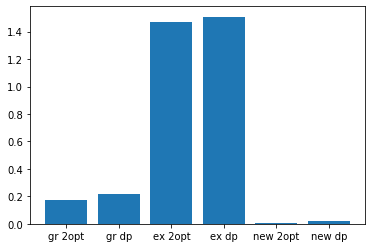

In [36]:
#実行時間比較
import random
import time
import matplotlib.pyplot as plt
count=0
greedy2opt_time=[]
greedydp_time=[]
exact2opt_time=[]
exactdp_time=[]
new2opt_time=[]
newdp_time=[]
while count <=99:
    n=10
    V = [(random.uniform(5,75),random.uniform(5,55)) for i in range(n)]
    start=time.time()
    improve_all_greedy(two_opt(V))
    end=time.time()
    greedy2opt_time.append(end-start)
    start=time.time()
    improve_all_greedy(dp(V)) 
    end=time.time()
    greedydp_time.append(end-start)
    start=time.time()
    improve_all_exact(two_opt(V))
    end=time.time()
    exact2opt_time.append(end-start)
    start=time.time()
    improve_all_exact(dp(V)) 
    end=time.time()
    exactdp_time.append(end-start)
    start=time.time()
    newalgo_twoopt(V)
    end=time.time()
    new2opt_time.append(end-start)
    start=time.time()
    newalgo_dp(V) 
    end=time.time()
    newdp_time.append(end-start)
    count=count+1
    print(count)
lis=[greedy2opt_time,greedydp_time,exact2opt_time,exactdp_time,new2opt_time,newdp_time]
name=['gr 2opt','gr dp','ex 2opt','ex dp','new 2opt','new dp']
for i in range(len(lis)):
    print(name[i],'max:{}'.format(max(lis[i])),'min:{}'.format(min(lis[i])),'average:{}'.format(sum(lis[i])/len(lis[i])))
height=[sum(lis[i])/len(lis[i])for i in range(len(lis))]
plt.bar(name,height)


In [37]:
shugo=[[(27.084686444230343, 54.87753088993349),
  (32.41803230740169, 11.61651224972517),
  (47.98078375178864, 25.836573528323672),
  (6.199938707108084, 43.998089144733356),
  (51.56963905095209, 25.526016960685517),
  (14.80979164584482, 5.825933689317093),
  (40.92024860902257, 54.25937342902963),
  (21.019826019531262, 39.61797405495848),
  (60.42021368162712, 5.296917483694465),
  (52.954624370375065, 23.907145855239765)],
 [(19.05452995565919, 18.503807971991627),
  (38.7236838139963, 17.75560825491686),
  (39.40721524858512, 26.32976726305616),
  (65.05478753384492, 48.26006381700407),
  (27.17902879352752, 8.769020338201546),
  (37.621174681598454, 14.132655103945153),
  (12.631373809213045, 34.16988633509236),
  (55.634573613503434, 41.05402486738616),
  (40.82688338774331, 48.09358098907312),
  (12.7650250521896, 20.962574039381366)],
 [(7.135916768943207, 40.323525540996876),
  (5.225463994620702, 32.143251741883404),
  (54.953224894740906, 48.88841878773636),
  (24.087762084339836, 26.86992983043504),
  (15.712794782680454, 53.06772328217666),
  (10.660081860246148, 13.005305180692158),
  (74.46149880669076, 44.67351519148502),
  (25.71037006907845, 16.686230131557707),
  (47.50773716130092, 16.059715739967995),
  (27.774352031502158, 25.73378705514247)],
 [(43.92156488466711, 42.94327031423537),
  (13.683250469269804, 39.89808655818118),
  (48.5925294660971, 39.81645475693421),
  (11.43096468066627, 16.712054512002943),
  (18.64096183079746, 15.083650862447364),
  (52.191963059771204, 52.6337353615517),
  (15.748245874129362, 24.258913278259378),
  (5.906915589887248, 19.806892071048527),
  (26.438676954992058, 19.43408159126175),
  (56.16591253802551, 13.347593543522125)],
 [(5.883706242908887, 43.22654577599038),
  (53.5240638925511, 35.619714689671),
  (37.2003303532158, 7.562478269350582),
  (7.918822461515246, 38.321471365608545),
  (48.45639934982504, 47.59841404520284),
  (20.504614463632397, 21.847690674556205),
  (58.65279969382913, 17.51323803741313),
  (27.645484084753384, 20.837673072927643),
  (18.050276405577947, 7.287141519292613),
  (67.43883122332979, 42.426665434509175)],
 [(17.93590661657674, 15.736503037437018),
  (47.50997504625832, 42.96300579144968),
  (48.56685131510169, 19.899641847946548),
  (36.652221077053724, 45.75398946078437),
  (73.98745421591428, 16.90719345468046),
  (59.19263176924378, 23.25322275536905),
  (65.1587046876112, 28.895422434933995),
  (62.04236287881381, 19.927077244386332),
  (11.715084003362186, 33.082047178545395),
  (67.90513982366772, 20.591438755532415)],
 [(38.68064138942566, 10.717617857084928),
  (23.42044324576213, 46.63595132925752),
  (21.971660853622012, 35.417740925250335),
  (60.90941400169195, 42.18031002971619),
  (21.53315418227278, 5.9395905719597755),
  (50.8167133985495, 22.819423817556167),
  (19.99251548395613, 12.563747409401056),
  (15.88130946752026, 54.41081152478075),
  (39.89137640794134, 35.53838688962919),
  (53.255535303998386, 8.056349953043375)],
 [(8.904009352485401, 8.634939857329483),
  (73.80771948668689, 24.88365596545374),
  (45.221758636938404, 46.594250316388944),
  (30.56387035698571, 15.740089220207572),
  (25.2744567653638, 41.71192183121084),
  (38.070460891506094, 13.975808931212637),
  (66.12192175766236, 46.454178947811684),
  (60.850173215844094, 33.053791280877256),
  (20.96832045683225, 18.690007805411813),
  (68.60764104333728, 30.670844786367443)],
 [(24.496155746763083, 33.45731701199177),
  (52.80682745343819, 49.73535632581351),
  (64.03641841206867, 6.9726715158299495),
  (47.3158350478643, 44.16433735736404),
  (54.65101440919042, 38.34170819665461),
  (53.42886296748845, 53.98649277808709),
  (52.45467778123239, 52.242847669150706),
  (63.93512098762611, 17.113455527261827),
  (66.77079738534101, 13.08765566093811),
  (5.504124497440498, 34.341116293757885)],
 [(43.00381922979753, 8.459440639886724),
  (54.17607545418168, 21.81151731434799),
  (73.80304333809887, 27.477634061787484),
  (56.51718222347426, 49.63661418288882),
  (64.62924549835208, 39.94994914199815),
  (71.17836472130874, 23.859867380166385),
  (53.16139407391771, 10.111016410124698),
  (73.66039582462146, 24.29696612811822),
  (25.839855480149517, 36.72429012112362),
  (71.69569666467238, 7.251092621353484)],
 [(46.3746949694282, 38.26981364623264),
  (62.046086332729274, 32.775978781630755),
  (74.89458429866791, 44.60494810075427),
  (43.99061617627768, 18.96897679825563),
  (30.28368705655473, 21.081562392220246),
  (72.83526279742456, 52.0964420503989),
  (49.60765481882324, 31.551945042543778),
  (42.486813680372514, 13.821715970104677),
  (16.494730825588228, 52.85627674597409),
  (33.48469985892363, 28.900805302968227)],
 [(71.90159625163822, 27.33673712189687),
  (46.33519169498981, 54.73432537969331),
  (74.40242416040405, 22.757364953438998),
  (40.69656391573077, 17.425926599187914),
  (25.426327627559154, 41.777268237698806),
  (27.638259252339658, 21.736530171253012),
  (74.32460186185172, 22.79072065733801),
  (69.84747254386964, 47.8338973044708),
  (52.291715805743316, 15.43620549305212),
  (26.866461686873304, 40.4975560887671)],
 [(32.87570152653783, 37.56919805572052),
  (66.94945157681383, 51.1338525921865),
  (71.89729794087427, 8.65622195608324),
  (23.55982772978866, 23.756560941928246),
  (73.12271582216385, 42.31261931110263),
  (67.94575850369853, 47.31661063913876),
  (52.78866059507898, 50.523429139309336),
  (60.54238967141656, 32.853767165345616),
  (46.39274404380464, 16.973703118937728),
  (47.79610007192466, 44.15141093667593)],
 [(37.53614687630103, 22.137482280696293),
  (73.69731509874329, 5.127497113740215),
  (18.046992836520587, 23.30781047815819),
  (57.95354169630319, 49.37370978290996),
  (18.758925664470432, 41.82404923862709),
  (31.857127844973746, 37.97549519563547),
  (70.39598809785889, 9.89118405340971),
  (20.246698751430102, 8.831985116058833),
  (32.994404383296185, 22.180902379226893),
  (15.697860578100972, 33.870026768292696)],
 [(12.547661897863932, 34.1967667057627),
  (69.62252710029951, 37.83582648483282),
  (41.932503476101544, 5.926354183401157),
  (40.17546963628546, 18.817669080942807),
  (69.55919103203543, 37.05885424353727),
  (48.95785259132418, 51.491503435154605),
  (15.680049475606284, 53.38689699784781),
  (68.18837255099845, 24.491983564174298),
  (74.96343737890503, 10.853368839642087),
  (9.643945968526285, 19.842521913355633)],
 [(5.502218395876531, 42.71105937374523),
  (21.272147112173755, 37.472903274360355),
  (7.1003840224075185, 24.29358032006877),
  (62.43278875516279, 38.45471135115531),
  (34.196484220726035, 13.660335584883727),
  (30.5767087056456, 33.13673798268351),
  (29.333362632043155, 33.9925742325303),
  (31.68862434624802, 15.830254258710886),
  (31.761882651476544, 12.522008188046042),
  (6.440368932036042, 36.56922190762245)],
 [(69.66512707207326, 21.794501406371904),
  (54.94084642550359, 17.961126126432376),
  (21.044997807930834, 41.68205574075567),
  (15.28649350705497, 45.81203656302173),
  (32.27438716162849, 35.92668758337405),
  (15.395629236536278, 25.55142159628619),
  (22.766877155172203, 6.663632578901825),
  (43.010402059416414, 14.805560392737423),
  (27.1555103875455, 5.241969613033493),
  (10.74972689071971, 25.107292596771988)],
 [(58.16628348660708, 45.97954454048015),
  (53.2862952840622, 20.97751383710444),
  (6.444033589711781, 53.7649409112611),
  (68.2728648366647, 31.574822829416927),
  (30.519904998605472, 54.17116168294618),
  (59.05328228798898, 17.65524511820555),
  (6.997032070168183, 50.85855633076121),
  (61.471455135659376, 9.405329027482257),
  (26.33705206874313, 17.81212254177683),
  (44.44787066999232, 23.61535633298214)],
 [(27.019312500422622, 19.995842354603127),
  (69.25590203141923, 7.878068634288522),
  (58.606580339467996, 50.58968771594521),
  (9.53536364616594, 38.54477824297232),
  (58.15695477409854, 21.733751878913854),
  (8.669596151611579, 37.336739900100525),
  (47.06402181623412, 51.09070044262211),
  (5.644627346752289, 31.8682407587804),
  (11.595379667971388, 25.09899458382624),
  (55.44369024959174, 50.68591121777134)],
 [(47.18878948993513, 8.151568103174013),
  (55.47274750369467, 37.77890780872545),
  (22.490211561479885, 41.10918551912514),
  (74.08868822062647, 5.104832470117544),
  (68.22396505659208, 14.541081940501522),
  (51.917352848309314, 21.44835260238121),
  (11.212494463163996, 47.8247390246781),
  (19.324871210759778, 28.67547464381629),
  (52.08344678254625, 43.40922413120015),
  (71.8453791440854, 10.518281946893755)],
 [(15.411744504797587, 12.85434824365569),
  (26.498695757040228, 50.55841364560532),
  (12.09491509862482, 28.776597044145237),
  (56.50452435594927, 7.239198645558282),
  (25.654577550056143, 51.615847984673124),
  (74.82369459063862, 10.588770719312713),
  (59.388612279167724, 22.550001192892463),
  (68.8838352061079, 29.129817660832252),
  (61.49000763610395, 12.773654568786998),
  (18.63006761906979, 51.138031232126636)],
 [(72.67625310701673, 30.226005376636873),
  (55.86723163815116, 36.83538251840342),
  (45.50566396578686, 44.08691848880578),
  (67.42072603507428, 44.64462138901537),
  (22.4878218691578, 29.242732009858774),
  (46.18420336281156, 43.12418789617787),
  (35.75911136174811, 44.885158152164145),
  (25.412972927327157, 16.476495908151513),
  (64.88150521436545, 24.57463428448772),
  (66.9062504626762, 43.8548829318369)],
 [(55.18491255254152, 40.62627172252566),
  (72.97619397892896, 11.537815468149262),
  (20.614418255644537, 15.05454092519862),
  (12.11556223425213, 24.37774044833579),
  (50.372902583671966, 27.393488748013883),
  (6.922259489952357, 6.845589749647281),
  (36.57839829573794, 47.201090540947575),
  (58.264771436581526, 45.93480382551149),
  (39.375790608155796, 34.17973141998313),
  (22.06143775480698, 47.35097822835908)],
 [(6.487146516467544, 36.651514727028555),
  (42.379668800632864, 17.75658272958453),
  (49.77009783372741, 52.00545211106794),
  (63.8379365293852, 46.39655741017618),
  (50.541255634948456, 7.540623428808875),
  (67.91857022654821, 36.36090869056964),
  (22.87820963752728, 10.963224479016265),
  (64.19042306500897, 31.31818251209493),
  (39.091250222193146, 22.71552756851974),
  (49.88727909816475, 46.03908556464323)],
 [(45.80613852132298, 27.232324822045758),
  (19.808700761168907, 14.787129416991364),
  (40.85710646574348, 48.29433488059987),
  (8.055092137368089, 38.670453301142295),
  (24.82829318935709, 49.44894125100783),
  (14.26322671781989, 20.618153207147074),
  (68.58469243176313, 14.998794636329622),
  (5.894392452686647, 43.76840556776096),
  (32.01626476677811, 45.58708575612478),
  (44.08301542768335, 19.09359676829729)],
 [(29.258219629276592, 28.443303375527506),
  (57.96922259031848, 29.244037049648863),
  (69.98822996039488, 44.43105434914255),
  (41.632656051301176, 22.09366613738123),
  (42.92880940158065, 34.5794020022084),
  (62.97903180952961, 20.835889677103804),
  (29.98469846859716, 15.91500299932795),
  (17.25680645355732, 15.998842395972586),
  (69.5522648572389, 5.143868547042835),
  (9.194717285632713, 25.67924230534266)],
 [(52.38190033909642, 18.12937871111133),
  (6.336718741985172, 27.758961617441585),
  (12.304910762837464, 47.34915113389823),
  (56.27987621351909, 21.91402350000959),
  (38.468068469065926, 26.870808637616445),
  (15.271742223537018, 42.33701887965483),
  (27.08114613621592, 32.442765796588404),
  (9.957755231273328, 27.753503634699463),
  (52.22266204629254, 47.123857582392745),
  (59.85827100580958, 49.953952869161135)],
 [(35.89823321897454, 30.230657181444393),
  (65.32750338791138, 36.13720754478458),
  (10.920612644952957, 54.89044104571575),
  (48.83996122081593, 36.2403699088071),
  (29.00416889920664, 19.251117837709348),
  (59.002131649867735, 19.191309467562043),
  (8.054249914839446, 31.92839432635778),
  (66.72742211890991, 41.505393695983344),
  (40.813094104867034, 46.03246641810763),
  (26.002417036199596, 42.32019564621971)],
 [(35.57676203846151, 53.232916583930475),
  (42.36440237093573, 33.288412002249416),
  (54.61400823003304, 30.3933614102084),
  (59.80331353431986, 20.993269753270646),
  (5.563773563955037, 7.850294497429679),
  (66.45671959538001, 39.10083025031685),
  (59.9459970375071, 16.0165949844477),
  (44.86944686547247, 20.757870692701346),
  (30.396648210888035, 23.2007763725627),
  (72.47627469207568, 36.86700154954012)],
 [(65.25278484578703, 21.183282164477724),
  (62.102381181562926, 51.58850536937277),
  (16.61362194834123, 45.42235313676705),
  (33.594044907095956, 35.72205993009018),
  (41.040432206387564, 50.483509101345305),
  (34.40472547880104, 45.666537495543565),
  (46.040791613333866, 42.473764129630176),
  (48.56917185069178, 16.970036451730493),
  (47.8937590885936, 21.748475876420198),
  (70.19079523954855, 9.032912199591216)],
 [(13.470720509834504, 13.331533836090982),
  (17.98769776279336, 53.57847034363758),
  (39.82640232917696, 48.36669334597382),
  (40.47164329722901, 33.12723734035596),
  (10.993050415321601, 13.521970727889588),
  (58.36224725021465, 52.890996657506996),
  (39.64143682981973, 38.6546459642087),
  (71.36828491171276, 25.312489557523726),
  (43.19059254785983, 40.23912378391552),
  (20.825109531518446, 39.95072244968087)],
 [(32.96089852179453, 41.41686862663961),
  (20.729316777812144, 29.116293353862474),
  (16.355191662898388, 41.13195575880277),
  (72.90975867987964, 49.55417131049435),
  (49.56073103290032, 36.09857762016064),
  (18.09751407367312, 5.115206166561466),
  (51.762245159138104, 7.158320247662193),
  (47.67994205868797, 30.561306439919967),
  (18.376218110981153, 8.295355688975354),
  (50.034303625046824, 52.20445060662686)],
 [(32.356986280982, 5.499083374090365),
  (73.7243358424326, 9.097289571581957),
  (8.37352452100035, 14.095216001968677),
  (17.5084170133752, 14.067728336699426),
  (10.426829596708396, 7.962081999833593),
  (19.861499819981482, 7.26594948068351),
  (38.15873322390152, 30.436308170797716),
  (51.36386119568501, 54.890761721546546),
  (44.45905381151674, 11.455461108009025),
  (30.016201549321767, 27.091544034756723)],
 [(72.03057254412336, 21.308075234047802),
  (60.7848444131091, 16.781132623944252),
  (50.47522515179379, 42.46768178743229),
  (18.039799895774834, 20.917016785157873),
  (13.91516138474817, 26.085205310849148),
  (28.427139608726648, 31.098046863383757),
  (42.59618757170584, 7.4210860403788335),
  (62.260075042634206, 10.300711603810427),
  (7.968552480751468, 16.197864426063504),
  (51.939301688403326, 26.3937709340638)],
 [(36.991795213602444, 53.97035400481731),
  (50.503696857436665, 23.20210517199231),
  (62.84830706992742, 51.96404611663525),
  (44.356783115013215, 12.53892231278142),
  (12.734264448080388, 45.27984707907199),
  (54.187958190751424, 43.41496814526245),
  (16.459540465482483, 46.080517293460716),
  (10.572609371645932, 12.785059807892802),
  (30.423365030668226, 22.154547920237235),
  (5.0580280848568515, 9.445838757155684)],
 [(26.615561235517227, 11.65825900230736),
  (53.501855243220774, 33.05774926243345),
  (28.455841081654153, 43.08037043644144),
  (30.396607059214453, 6.280617695713293),
  (58.88678486183042, 53.36471496269678),
  (7.096126238627392, 32.08810189800103),
  (71.71868111258776, 26.017050118778375),
  (26.670218506773267, 35.716654167999124),
  (43.56572373268286, 47.09046527551259),
  (49.81813728419663, 48.8030667026478)],
 [(60.55272180740697, 38.86718065684051),
  (49.51526733784981, 11.785987788249258),
  (31.908795830050536, 38.922743701355515),
  (32.19334614219081, 48.371948960236324),
  (45.42197336275443, 46.61299098162649),
  (58.627143797009055, 18.877062853101712),
  (33.94407208434182, 40.8283911173155),
  (29.705983001609273, 8.546710794982488),
  (67.39105073564733, 7.774595558593596),
  (32.15972020041818, 28.772328938500785)],
 [(45.50459692974656, 27.822627052380522),
  (65.11919881857472, 53.88822896235761),
  (50.14590591357894, 22.743896595077967),
  (22.373034545998188, 34.00606048316091),
  (31.407779041296738, 23.80345587418449),
  (13.875349352943852, 35.78810381029734),
  (66.13230528470226, 49.995740084467066),
  (25.581103499678896, 45.18415971328983),
  (11.740324138219915, 12.33200120223244),
  (7.923616288205175, 22.36996886362792)],
 [(44.24791438125143, 21.956966012631845),
  (43.80924546984696, 43.91900920784892),
  (49.580310830130685, 25.39354856398756),
  (5.017365371684673, 14.634332223303465),
  (74.9910246747911, 54.05730577580042),
  (62.94084938712784, 15.55480257251239),
  (69.46683873416154, 17.94990391645353),
  (61.26304487328298, 10.100765595123274),
  (6.176812847306078, 15.251294229795166),
  (45.385707977529634, 31.15577586590319)],
 [(11.295759857037764, 13.123440151544925),
  (23.690051433911805, 21.743993498313998),
  (48.594839045065065, 54.65228516157508),
  (27.07611935350507, 24.955433910302705),
  (72.98760846770438, 15.511772986563928),
  (5.506886455598816, 6.548400716397796),
  (10.569708827255575, 36.861404538755515),
  (41.321773981304325, 12.243568263117117),
  (74.69753836160959, 46.80770047972508),
  (7.3357227370427855, 54.90307090262161)],
 [(6.690356118411895, 24.26644673472048),
  (34.838719104785156, 41.45132903855005),
  (60.1891198343707, 32.051320509760934),
  (21.5290889485516, 30.310671510655997),
  (16.746015408177218, 20.70142259549675),
  (11.430365627880128, 44.03833469297208),
  (18.807411533348684, 6.6143972657441665),
  (65.6180696370505, 36.800129816579386),
  (53.22714636739066, 11.544470740288094),
  (55.37881609432997, 35.78778687831915)],
 [(59.76249933876191, 23.55757655902658),
  (20.567982908883337, 33.527161037923044),
  (37.120192308309484, 17.670795571887506),
  (31.142068672070124, 49.18010536431755),
  (53.963021901375086, 26.629251889275412),
  (69.93769965065165, 18.879379194844116),
  (32.82198427531782, 17.678715380090317),
  (42.74788240827133, 24.71604093141572),
  (64.02335359130291, 53.89223592819986),
  (33.74478085098324, 19.0880341355266)],
 [(49.74452470644901, 18.315214033019384),
  (44.8265622922196, 27.90661962930128),
  (32.64248562315462, 43.72746126971696),
  (54.49794492447722, 43.88058505175581),
  (48.403312332206134, 32.39986171451904),
  (30.065323279600094, 27.724874033594556),
  (69.36657009547632, 13.467524084185735),
  (15.317270197780179, 6.630815777326316),
  (33.21458753201021, 10.38373690168546),
  (22.432007123239497, 52.199637840649736)],
 [(15.25774471188296, 25.99571915533141),
  (58.13011198931337, 53.07054888719078),
  (28.831093085614494, 50.121647066269325),
  (20.310120435832836, 13.89773985246342),
  (71.07789944911715, 15.984119045477724),
  (72.57664697954404, 36.291631729863084),
  (26.273932638584125, 16.431527179285055),
  (51.14843187132083, 43.77464717370761),
  (10.339218677066414, 5.53253433295683),
  (52.398915265371386, 39.016069683653946)],
 [(17.880231795437517, 30.991457618339332),
  (42.760411153492214, 5.039330141275206),
  (27.597651896433106, 21.40505013904157),
  (11.033902721396977, 54.218998940930156),
  (15.03452891706988, 53.615440561545476),
  (38.439900174728244, 31.960915802136213),
  (66.92419274055912, 53.3853264475472),
  (10.845736639871312, 50.9930217061022),
  (42.55070397219617, 51.466846924774885),
  (20.363141287460387, 38.49975685001033)],
 [(13.943908216970136, 36.49367747415906),
  (14.871532479636535, 46.11787237180572),
  (68.02767006782355, 10.565455947221897),
  (30.835886380948182, 15.660299373991144),
  (70.55444379335842, 9.202198516866833),
  (47.03608295112847, 7.473341352818337),
  (45.06176813625987, 53.45397309201044),
  (58.39109756001406, 10.092535623883393),
  (46.51576793651969, 6.114184532027441),
  (21.82881122363585, 51.30485234660391)],
 [(60.89560441698874, 7.338464889161224),
  (13.690836182507024, 51.74584698554296),
  (10.384830366689595, 29.679620462358848),
  (6.5026942002010415, 32.24968288305455),
  (29.80912923548192, 32.087840913879184),
  (17.875712182588835, 28.953025375474212),
  (60.84929120807405, 8.973744119593492),
  (9.36547956230907, 51.86011945945131),
  (19.356443038144985, 44.17232747481099),
  (17.59183081527744, 11.255966069356866)],
 [(64.98701059637824, 10.18356508303533),
  (28.35976906605123, 22.965285355994176),
  (64.63595622608008, 49.28013666530957),
  (36.35684792951028, 12.795181550459956),
  (18.709439710119646, 30.525529655601805),
  (48.072475031226666, 51.83053617568528),
  (46.71122239739884, 21.050400931616437),
  (44.70445519097155, 40.19653351967859),
  (27.770488017479227, 6.488217512896312),
  (47.22325172437011, 53.69831324144834)],
 [(26.194153775222272, 16.878390582033767),
  (10.840855487006955, 38.39553460398119),
  (6.412413097806104, 17.009958479070065),
  (10.646171430519873, 54.40942006365084),
  (37.34529719565305, 53.37741549409028),
  (7.601849962762749, 30.875816217380006),
  (50.386107140890836, 7.784866122260987),
  (48.43146426777367, 28.471905721294885),
  (12.287447878080497, 15.566534110661507),
  (14.159259811222869, 19.423546776950396)],
 [(28.563873301479166, 8.880179879974499),
  (60.33616212604092, 47.19746947939155),
  (23.491359342183944, 9.787249998343128),
  (34.95203377567582, 42.87847862193469),
  (68.9124230280821, 39.33307289275492),
  (38.81970795241718, 43.19202075961141),
  (60.91835681651772, 35.79627772590065),
  (19.738851425748827, 51.69701499122388),
  (47.241188549838455, 15.06997979491871),
  (44.80036555301669, 10.453408357726858)],
 [(10.496146199132037, 32.97180043397955),
  (15.686123631258006, 12.081125295607759),
  (60.86537168139923, 16.66238938208606),
  (66.72346691251602, 40.88150027266788),
  (48.93923300933116, 21.21744749388293),
  (14.418528550491988, 27.540750159624878),
  (13.717290509644025, 9.846399987740297),
  (42.75293113219579, 48.37136219900165),
  (57.030427903519204, 37.503888975639455),
  (31.222689306000376, 24.27162094998005)],
 [(28.121134038129536, 7.066773721993914),
  (44.2406865969094, 43.45421333541026),
  (46.54631046248814, 38.48067033185316),
  (21.029801953358007, 49.639583273383124),
  (52.78829324082822, 22.92950021380429),
  (51.661433047789615, 16.375244795345573),
  (26.325313026989654, 49.007697265951734),
  (48.25434225010301, 12.16011229243999),
  (45.17753210230898, 30.67425943697658),
  (72.153751366341, 19.69844910794899)],
 [(50.740417104852995, 35.71725109732212),
  (16.947665687370595, 39.52313306030632),
  (54.810327941623434, 8.360718783354194),
  (32.626642999150135, 31.55678591232467),
  (12.971966550352368, 9.351614757671745),
  (32.62095546063687, 16.956769512846307),
  (58.42414013409744, 11.844352141152532),
  (44.35306507032396, 22.621628526146637),
  (60.38879596408413, 27.51198552115003),
  (71.54451145717273, 17.065957942414244)],
 [(37.1824075247987, 42.46985662380101),
  (69.1936045916412, 52.03096555440741),
  (11.27561091036745, 8.486032710174724),
  (20.716154315903534, 35.325430080505406),
  (14.28100494943987, 41.00210248936877),
  (56.27933256721114, 41.39680583427379),
  (60.30902042149641, 51.86418080706522),
  (66.42070686638722, 17.832569157273994),
  (71.68258045583401, 47.82470696446467),
  (21.002436046232923, 32.804884285702826)],
 [(12.962809120118106, 16.962512455042145),
  (23.936207288310182, 46.21283459662801),
  (37.988767030469866, 18.245689663976318),
  (32.15326470379834, 25.303960695466035),
  (7.427176033832187, 44.01980051473639),
  (63.6180178411694, 15.886435919435055),
  (42.72994903133168, 27.638153966763046),
  (65.99719967744207, 25.024270128186643),
  (54.05212160212361, 18.70249758833042),
  (54.7983968774279, 8.301675757305139)],
 [(6.252134219173497, 8.524114919635801),
  (28.80533332045984, 16.489307356460227),
  (65.99839773345552, 50.30631727367259),
  (45.47922133807177, 15.215051016209847),
  (24.203715373611104, 23.35577359932316),
  (52.49813141291572, 21.24695833673239),
  (69.97139431996531, 34.398061262754425),
  (73.81574126417348, 49.851707835244504),
  (32.32520157400301, 19.75485397491672),
  (29.3471185327319, 8.300302106737242)],
 [(31.625694088262286, 27.856727204609335),
  (8.516961507420863, 41.92842891245651),
  (18.82413052101063, 15.633438439555126),
  (7.35190217813236, 20.77948302830184),
  (63.4112042800774, 6.110973625780337),
  (64.358694330343, 14.845500245250555),
  (19.368554176488175, 19.838536733560538),
  (28.99268279721467, 8.075471779167483),
  (74.38865668437023, 30.657826040784865),
  (55.713536798030695, 47.245176427273876)],
 [(22.638125950055034, 48.37181592630704),
  (71.5747107617879, 9.82491621258217),
  (60.42200701835463, 48.83634513209492),
  (5.478234955748816, 9.713244250327348),
  (48.05231339714935, 50.38296925501878),
  (68.6655809349003, 20.13351926243977),
  (60.587393208426604, 53.04980270710864),
  (17.804575565502837, 31.012878178315567),
  (59.52830983275143, 34.059220784999624),
  (60.25900114964167, 44.97015569311454)],
 [(7.303504605879965, 25.9712826293213),
  (60.977181973872085, 37.84029664888736),
  (28.331452525822133, 21.057030103342445),
  (30.35252812522497, 47.26978583632236),
  (63.65933812787531, 43.764519120271395),
  (68.52840727791286, 44.22590493567549),
  (69.80816810579583, 45.63405712136829),
  (13.903437939846663, 43.50825870412935),
  (20.163798896252032, 18.28735350540093),
  (17.092460977672168, 50.370608648506355)],
 [(23.088621260715534, 7.250740902809689),
  (64.3002356681186, 50.32082522809864),
  (14.538127215229954, 39.068427054486456),
  (15.129988159609383, 45.62243088181569),
  (31.52757380964878, 53.28247860509574),
  (58.6295960586931, 31.172508046223115),
  (48.404635694041175, 38.52725287939401),
  (25.693302527924697, 32.16533648071926),
  (20.46897679823741, 10.940282687499865),
  (22.73557041461977, 33.51037934536616)],
 [(64.86413621209218, 14.852377815824493),
  (73.97223358556886, 42.305861898316024),
  (39.90752584509101, 14.044087729353095),
  (48.77485350206642, 20.53226890914261),
  (28.50186977479471, 44.53511513777872),
  (61.60666053267755, 5.646326030262778),
  (9.416088907879637, 20.758179097832738),
  (25.269610914799237, 36.328272060981135),
  (66.56710738396313, 48.79860639891538),
  (19.823533417833772, 38.74527025753114)],
 [(62.5758718395286, 47.628946368615985),
  (74.44963805139622, 33.74647053047581),
  (18.971415108172458, 12.846704574430325),
  (14.883814485392364, 19.324903834530787),
  (55.054564973542895, 15.765729026784587),
  (13.128328937862987, 30.358761750708087),
  (51.76869884706113, 38.57355408713318),
  (54.25655635713322, 44.395321472364245),
  (59.072066444520296, 51.69718487550627),
  (30.163389310207634, 35.0118163006516)],
 [(40.09618208631342, 48.44058949296273),
  (43.02944943115885, 52.94954585668318),
  (57.866288565242414, 42.49472884304979),
  (41.21600647947194, 25.82919414196945),
  (21.715064906415673, 23.717102637582006),
  (29.988149745850826, 20.429034122116636),
  (63.718460394311656, 45.28737041616919),
  (67.48064753716262, 15.651551556359545),
  (48.311599241832994, 18.448846164945323),
  (51.10040240100663, 13.451475600017726)],
 [(66.82389737825108, 16.129028233190617),
  (20.17293586304841, 29.93431428066518),
  (62.555153112367066, 11.35056649918193),
  (13.595187862308167, 37.45448464359433),
  (20.611656327491318, 48.65860804550221),
  (47.97293397144101, 37.42872463069412),
  (34.57384766945502, 35.6716939023533),
  (21.96267064099327, 10.295833901963647),
  (58.91468632594855, 43.857784055082625),
  (64.41271818130232, 6.1738864076870135)],
 [(48.34382543826047, 47.053881602464486),
  (43.12589215585055, 13.573049484538487),
  (41.172917733064324, 54.05972666804591),
  (23.19447099035925, 54.20894353526499),
  (22.58994355858466, 15.728535177362469),
  (60.84812307412772, 14.21730148030499),
  (66.16630774446949, 46.096358197431684),
  (26.207786246425453, 16.483274628743406),
  (22.11013820094334, 30.09651611441069),
  (56.946387643885615, 35.35708377801461)],
 [(18.89744130834474, 6.329501116579479),
  (12.210550004798026, 40.89080367478596),
  (47.646868654465344, 33.862304048568475),
  (10.852649092251472, 30.63701424869044),
  (68.65175880571643, 15.499552799302581),
  (48.004376678960114, 50.13491033860703),
  (74.28323081991606, 11.784039857256369),
  (25.790647163775887, 50.626063901166916),
  (62.01556542704958, 26.889249642983792),
  (8.071935426843288, 34.804439383958595)],
 [(22.87880549940425, 35.94501782736937),
  (13.790482936886733, 50.4980445077873),
  (18.700640943371344, 9.160450692594758),
  (70.94447091075737, 50.510624865409596),
  (30.12138779140093, 28.450816592121054),
  (64.93472530906797, 39.40242096606237),
  (62.63336280366129, 47.51945693837641),
  (63.004905195145305, 40.09375824420381),
  (50.033041630623245, 36.250954570280626),
  (16.614247098895007, 52.886104243946384)],
 [(28.65812733900844, 28.218847393754633),
  (40.36417041929164, 22.83596988291274),
  (13.200451358405191, 44.490921109301695),
  (54.381653679014974, 54.651244965418414),
  (15.689786130596852, 7.61665056292551),
  (57.07333797409236, 40.79645455692179),
  (70.09248676438526, 15.554417728985065),
  (34.529120915910056, 13.469085774545093),
  (64.94575407240767, 21.049752407183725),
  (11.661138348373763, 8.45560656685096)],
 [(5.241127917034689, 39.60476967642863),
  (9.744229799121344, 42.711417175563724),
  (50.600936089684446, 42.8705500399816),
  (8.209754156991554, 29.741338660421157),
  (5.8969146848348775, 19.178734885743005),
  (22.315639903993976, 7.511742392378863),
  (67.01785280012646, 13.128499562963565),
  (38.778389783549216, 6.926465526452375),
  (22.413615741017065, 19.39978452038106),
  (54.28837156078456, 5.136918353510341)],
 [(54.304498735547526, 7.487414463700254),
  (36.7998155973451, 23.85897554043173),
  (53.006704446613114, 45.394490392655975),
  (29.383454208675925, 26.2616902514624),
  (72.53346551785846, 39.67383279593942),
  (43.23533895302603, 50.87295360586889),
  (32.45816814862822, 49.8511919818785),
  (46.5051192380052, 50.416548150064074),
  (7.8803968004659914, 39.36650531235969),
  (14.310160134382667, 43.395095257141996)],
 [(16.6301942210578, 20.105756578149595),
  (47.06981906508005, 41.64682215820131),
  (7.710439566746423, 8.965832695419486),
  (70.05042317797103, 5.764246712371941),
  (9.167869865646903, 26.672584487122048),
  (35.73974269860538, 44.97349631331908),
  (21.40133989478815, 47.12607234695371),
  (53.3998430697808, 47.672754806208374),
  (58.45814087388953, 13.980342242597672),
  (31.92416392925617, 28.40983436166194)],
 [(24.37179003397587, 16.192407025355855),
  (43.04841021638843, 48.40279729965016),
  (37.876743415663945, 15.159980754668812),
  (30.189860968056596, 9.506371428196221),
  (18.52291876474765, 5.4582788554506),
  (37.571812541026574, 23.550495284786),
  (64.16598317147216, 37.31529807589214),
  (53.14675561196485, 25.274500241845665),
  (74.35660075798832, 12.264455239336176),
  (7.744505431069263, 54.054278178994295)],
 [(21.244050681493324, 5.54414836827037),
  (51.34723608037796, 13.395421115311718),
  (19.409644428703594, 7.655925078920962),
  (60.21493693531199, 8.296223479647708),
  (26.46887511917569, 52.44532732777023),
  (41.500934403277334, 30.250588566852343),
  (23.943226438308283, 21.053505874636965),
  (55.79093667605503, 14.279449142126623),
  (69.53703253778068, 21.951970181540226),
  (61.53068577885267, 41.57453495013822)],
 [(54.016430712398616, 26.447100799613178),
  (47.001480782972244, 20.704141952678512),
  (67.7541998341907, 5.357445015924352),
  (65.27595499417383, 51.65441678738546),
  (62.5204766044401, 26.489676519942673),
  (48.70942088124304, 51.88887731140066),
  (19.155231006166083, 44.508476637026035),
  (74.41117654064688, 7.659217703210798),
  (23.759611763102885, 47.405637494848584),
  (49.84525713999665, 20.948194797868286)],
 [(30.226993244401157, 6.572634250972083),
  (44.39543133339983, 29.76905529303223),
  (10.33853465702182, 52.25301373501704),
  (28.087130583844232, 8.705887545519886),
  (71.47393899564469, 26.697034233942425),
  (42.92830842036993, 24.076857173178535),
  (50.04744515675483, 48.90601650560233),
  (8.53480180728969, 26.166614051969706),
  (55.446908482964574, 24.459603803630472),
  (23.46091319184411, 28.238578676785437)],
 [(52.99050856437657, 53.1752399673048),
  (9.145059809712457, 46.67047047517396),
  (24.502384457836314, 8.161699526262346),
  (57.910904944571925, 27.531421158732428),
  (21.009371913085843, 37.48313982659381),
  (20.40286045570436, 15.805010793861708),
  (44.33921826379055, 17.120040513894338),
  (35.70094185340295, 13.023939821173265),
  (21.203833655448065, 10.240645313159092),
  (72.56958319301103, 12.106228770252294)],
 [(37.46987445079164, 44.22289313531234),
  (10.136820836258476, 19.029051589819797),
  (65.21396509626118, 8.344391824256359),
  (49.8714857102733, 9.92493163527563),
  (49.85077964816823, 28.62535335760782),
  (10.114967204796997, 46.524202940579066),
  (13.303514503952936, 18.898951170003865),
  (34.65931821449273, 15.661757854593368),
  (59.769408202811725, 16.896783399229854),
  (9.342663339395758, 36.99645150442579)],
 [(67.77104146125356, 9.823265650403247),
  (54.34029208273839, 43.706637412440784),
  (69.98235298342335, 37.21234564585173),
  (17.590002167674932, 25.549308916049803),
  (25.00711242176115, 27.492424909893),
  (55.54891523646874, 5.5603754363983136),
  (54.91007677565095, 33.34160263148129),
  (47.71719646665986, 39.76857785448675),
  (8.749856475357495, 22.748830311214096),
  (74.01855965492281, 31.890741995837743)],
 [(64.00365998248975, 29.90502726334025),
  (59.793414397196344, 24.11137532257074),
  (74.23798641573352, 21.34504905075993),
  (57.50941680057408, 9.528106955526944),
  (22.06907758950375, 39.12753242168081),
  (39.932933725028825, 15.81214495122811),
  (67.35548385340377, 46.50023122643653),
  (51.731490993172464, 43.24958679489915),
  (26.266984123156995, 43.67897376057471),
  (19.35143651787911, 31.38831090317119)],
 [(47.33818255716304, 51.43141673589931),
  (60.452546624056374, 7.929249731461386),
  (43.46849589554907, 6.444648855231268),
  (53.44675245524811, 22.7425761045651),
  (56.245546170998345, 28.999330061419645),
  (74.4765438784753, 15.197208880458868),
  (5.334389351449063, 43.6971183832237),
  (6.350124239454407, 11.054966933878092),
  (40.32038696386393, 23.572827260686132),
  (29.9200944043272, 52.04805223164278)],
 [(12.935590404336157, 26.35336370859826),
  (54.368487472336746, 45.83403861426764),
  (45.88542453412002, 18.824344136894535),
  (39.1838849404126, 42.665433388385196),
  (23.219282578156676, 52.010185760706015),
  (45.65563038736376, 24.140620200926612),
  (24.26235793204796, 39.176170002900065),
  (5.618470944800908, 8.363204364805167),
  (55.21579724022711, 8.079623617068695),
  (13.244536573222156, 42.46694377742868)],
 [(42.406709474116646, 13.050257330374189),
  (10.58909175366999, 26.096443567874484),
  (74.96191145063383, 7.155317952551828),
  (41.30486235096192, 19.187606549388974),
  (44.39428015499761, 33.28952616407953),
  (70.20875631599752, 51.25482857243678),
  (5.554282161841101, 34.7266987747598),
  (68.3907336613612, 33.51810416122825),
  (44.69947661742015, 34.300900083625194),
  (34.78125840016933, 12.734830735032089)],
 [(50.10915031772669, 44.01906325483676),
  (55.38188906257527, 27.201171593263535),
  (23.670202541482873, 29.911289986118533),
  (59.96189500183979, 32.42223826082414),
  (45.92441521175766, 50.09581131204767),
  (38.605476211487876, 5.964591395731213),
  (41.54332203806284, 12.146854653673673),
  (70.72945385844537, 15.616148078927507),
  (69.90450553652495, 26.370201895440587),
  (18.968946834761592, 50.368889284503645)],
 [(51.80823432743394, 28.4818633677564),
  (62.985006624367955, 48.528129880272424),
  (65.05736545984631, 29.237137565355532),
  (50.22205825259719, 42.3272982737219),
  (26.76231549559359, 39.14077522103859),
  (63.2097421059596, 41.94816512247064),
  (9.016745855757835, 5.2543321514443475),
  (38.91059631952105, 9.535923686274561),
  (11.803786550884869, 40.47055932656926),
  (55.01445076761398, 20.702911728831104)],
 [(69.96248438388893, 47.31549244660662),
  (17.904479216784665, 35.199973728774395),
  (21.455187513598055, 5.971390845004594),
  (9.091526808654802, 46.87724700130249),
  (72.29131627115154, 38.36038582254983),
  (35.69538730994375, 6.884066683755825),
  (59.18614257138172, 18.440038499975422),
  (17.44416034433551, 11.877182178197621),
  (5.274267308209573, 43.567516068128874),
  (32.46630335904035, 21.03260631585434)],
 [(72.56398615182663, 49.08859658790888),
  (53.01048290022615, 33.96842570698185),
  (14.123759673749861, 18.678353965526874),
  (67.55495128422037, 5.001902063876563),
  (8.659907650317688, 6.14761028635268),
  (11.739262185256628, 33.597617626259094),
  (56.057716995703444, 39.45968862328887),
  (45.12725442281581, 27.014441718424376),
  (14.213246879176198, 37.453348105063576),
  (16.631769342728266, 46.046743366646695)],
 [(64.12301159102535, 12.018334076150563),
  (27.671178179529033, 34.5204637469179),
  (20.718674378480294, 27.514147286856918),
  (27.670777266613253, 50.51945848265406),
  (7.5787337945552, 50.53944186957117),
  (38.622069045641865, 30.558508575253718),
  (34.10269689187035, 38.57651974829914),
  (38.23296118901896, 9.549574819424723),
  (73.50434449092883, 38.33407282571684),
  (10.242390320088923, 45.16221561052366)],
 [(65.06098544887166, 12.131077892480665),
  (14.8258796466377, 37.52638925245168),
  (26.80876932429698, 32.737921640244664),
  (39.53587296209154, 9.011191807631864),
  (9.528931708603794, 36.8631413818438),
  (71.33621471026962, 11.359394046541256),
  (12.563443503669724, 20.71165536183905),
  (46.985722703982184, 15.611502783029941),
  (7.766310372040753, 52.746137238577944),
  (45.14414786142985, 52.888662968149994)],
 [(64.52537017493586, 46.15167729779149),
  (72.11613950996964, 43.98597498913275),
  (70.38813310968212, 48.37941421984859),
  (74.04739549084763, 32.61267220648378),
  (64.54482207974954, 12.101095350184945),
  (8.923021390731869, 54.879949000706205),
  (68.61967495451594, 26.92871670475482),
  (36.758887507056784, 23.443516213667483),
  (68.01437516345825, 46.69089302232622),
  (59.00118697634159, 47.37880805694011)],
 [(20.275050644740865, 37.18368994317425),
  (24.18476371350615, 9.785027271076853),
  (8.049141358983832, 14.020281377770962),
  (69.58971684460431, 24.702331554668927),
  (9.6071196160939, 43.54837085960585),
  (46.710849846324045, 14.055718665382578),
  (35.170639819495875, 33.16452160913005),
  (41.930545744198135, 40.401283267484516),
  (48.86942712133465, 29.52474549875111),
  (25.78770959715179, 27.043918381192036)],
 [(11.885070675102167, 24.90808753421999),
  (54.300349643351744, 21.981729933844115),
  (53.786802503136855, 29.230847296301928),
  (41.81611396663213, 25.610932891982937),
  (67.16997436333959, 42.681706052245666),
  (68.87104282962676, 15.406719046487378),
  (38.782797431563594, 15.156408375502334),
  (35.074292391363315, 27.79801116606443),
  (52.12947470635895, 32.99706716314658),
  (38.17101570595783, 54.0145846316431)],
 [(62.0590287177804, 37.416172457961366),
  (67.200323378853, 39.17840013333212),
  (37.16162678565403, 7.751795848998167),
  (18.761665683922864, 15.503481943857656),
  (7.262008910139464, 44.11397687870222),
  (65.50999695128345, 30.049236148284997),
  (12.617836700748729, 48.94395762024424),
  (28.40958746029257, 35.443194989129864),
  (51.77122386553925, 39.4805294348795),
  (45.4360420375293, 34.80591591905788)],
 [(65.60444999477723, 35.323010809568075),
  (29.627559760993115, 28.342741211908237),
  (30.747949547012666, 12.04032401923963),
  (36.04413298300544, 44.6239884620077),
  (24.43735402617677, 25.24040672490485),
  (13.941381855776626, 50.26147920662567),
  (65.62688543116904, 29.867017017560013),
  (53.69351426186478, 10.04887099206946),
  (26.88509355191907, 28.815130151758364),
  (18.954774724650353, 30.29787793009794)],
 [(23.385694416747405, 24.064888230101886),
  (66.53377267399514, 5.373609842731771),
  (73.58485929101845, 49.99015395577111),
  (23.05932203608042, 20.319602519063597),
  (6.590927679904945, 10.45335961619866),
  (61.472988414084156, 33.02790867721876),
  (35.332074215447975, 16.310740632160098),
  (35.602673180510536, 35.11776709821046),
  (22.157716624369684, 26.70386713219567),
  (24.1525064893953, 13.584130319321675)],
 [(37.29339292547491, 31.017951401338212),
  (73.65985914147286, 13.845956070062938),
  (73.20609185018104, 20.17997428558443),
  (53.91551531697863, 6.359691649028639),
  (68.12184230879865, 40.06448987711362),
  (73.0915786609419, 8.672995732841583),
  (30.86204967693194, 42.080528700061855),
  (40.10102621326176, 13.595081982567093),
  (26.57255924178647, 7.133617226840329),
  (24.5479430602606, 27.686641714777554)],
 [(28.484380736287935, 51.19163318188908),
  (34.712732976483416, 54.24981557298534),
  (55.034367316981516, 6.57521015568628),
  (30.812809718733345, 44.57381370896448),
  (44.97009033108258, 7.928229519995868),
  (64.58075695107155, 13.009372580678281),
  (11.820319802050872, 22.4008664031049),
  (9.98610382336122, 45.46459083128842),
  (64.02349202226495, 53.968362610492186),
  (35.611047579233286, 41.10958665480887)],
 [(16.803274445337323, 13.635077561117981),
  (32.51453225812082, 11.210547594268656),
  (73.13171723109917, 29.668314850296426),
  (15.05407898910008, 30.878603575146098),
  (60.65495103165606, 36.22452760630591),
  (42.305884637976305, 31.60806204952479),
  (32.226026639928115, 36.62807226813442),
  (54.27681817386982, 44.22640515800438),
  (32.27494853931953, 32.8922469228518),
  (58.420579245185486, 19.34471777666816)],
 [(27.029083490915323, 44.98990528776092),
  (48.84312634215302, 52.65432179743211),
  (73.55733342987891, 16.519625941674143),
  (45.322526037177894, 8.92694498449739),
  (68.34291517700663, 48.73288025244729),
  (58.61900794658226, 6.468339866172919),
  (63.400008687995054, 23.723837239087317),
  (38.320690791247145, 33.774232238607595),
  (63.94846632168278, 37.30681812400402),
  (40.96451585554343, 47.744045067785905)],
 [(74.06027484653278, 45.72564789898323),
  (31.085113044767454, 37.75809511571886),
  (7.491925418407384, 21.878989173390774),
  (36.19662032075955, 31.526538527548833),
  (46.40179964452811, 12.049511951211029),
  (15.659190350616994, 44.1542469693854),
  (73.36552151620774, 39.42894666533859),
  (24.2744619703269, 25.579736781046126),
  (72.04700004841453, 43.775702924366186),
  (6.115740309667847, 12.581442655317977)],
 [(7.611721839032123, 24.082887331970287),
  (26.75050535473077, 11.863235607669838),
  (12.23621235035151, 16.33925031006638),
  (47.253750255008526, 41.409870601709486),
  (8.633281233349901, 7.426880337691495),
  (20.340197832227545, 28.52038143189793),
  (46.76602510143992, 22.20870910927105),
  (17.491459844539847, 31.672483491919124),
  (74.75876412050448, 16.86523979691529),
  (17.685006634433876, 34.325363138765546)]]

In [38]:
dynamic_alpha2=[114.22901182653997,
 100.54087599405065,
 118.62575840180318,
 100.03173662258801,
 122.6670616830443,
 93.98168083647626,
 104.53818952458714,
 117.02723510092792,
 96.02428465563192,
 91.34264021171971,
 94.81157320570864,
 115.88861408837622,
 97.12648349624104,
 118.40476715156711,
 137.62501745785505,
 85.0288595645076,
 97.55929392407643,
 123.22228550007634,
 120.68506245025816,
 121.61247569262048,
 128.0479252299564,
 88.16521976447306,
 115.5996635425327,
 104.01273369692751,
 108.00660386649444,
 99.39894354767766,
 107.22561024430885,
 107.46949532198443,
 97.12399518886359,
 92.74777274214252,
 104.6296498312839,
 116.56417809627317,
 98.03037530907068,
 101.94099713556669,
 118.76529290810484,
 106.98771264089466,
 96.01742953155389,
 109.96432955566318,
 125.79369189435614,
 147.72985042098318,
 112.24925515880274,
 90.68148539394738,
 95.7303917447282,
 119.65054375590782,
 101.94712882873424,
 124.04952198341701,
 103.26121470897102,
 97.71237907408366,
 105.37121081210478,
 104.57325155225051,
 113.0924484456485,
 93.17071892250003,
 95.01419561105882,
 108.96984819433797,
 103.7917120598669,
 109.12953581603436,
 121.55617847877699,
 117.77893666533913,
 119.47140374050986,
 105.79669793741728,
 120.61368418078474,
 112.07461602294345,
 93.21061182281255,
 117.70392999090906,
 108.27485194825789,
 131.34676572533476,
 109.58923616372888,
 124.11524664548597,
 114.99765368587954,
 99.1730446162245,
 115.67719146991016,
 110.64363566742121,
 105.52464837529718,
 116.41613336458354,
 108.25385275433975,
 108.30122919657775,
 114.42486163292762,
 115.64900729119528,
 107.84835869944145,
 125.15713042234786,
 101.14397135381769,
 118.40975045161089,
 105.32430448712145,
 109.41123750045519,
 130.5128724707315,
 117.48624030380077,
 113.04532141219921,
 124.4739218987626,
 93.29991048654581,
 99.03424651589397,
 93.86323086835424,
 112.77648492274253,
 105.6271144643105,
 98.762125751897,
 107.20262942317413,
 122.00793658280779,
 96.83212073278122,
 101.17061138374197,
 132.75583672475852,
 96.45963216631314]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
gr 2opt max error:16.831208484399372 average error:4.837194875959777 number of times outputs the optimal solution:3/100
gr dp max error:16.72916326738225 average error:4.421699812762409 number of times outputs the optimal solution:7/100
ex 2opt max error:19.93298157223392 average error:2.5917159310886797 number of times outputs the optimal solution:28/100
ex dp max error:24.48848314428117 average error:2.6493424681297335 number of times outputs the optimal solution:24/100
new 2opt max error:23.383232481612193 average error:4.514236713165311 number of times outputs the optimal solution:11/100
new dp max error:23.38323248161218 average error:4.483940822489734 number of times outputs the optimal solution

<BarContainer object of 6 artists>

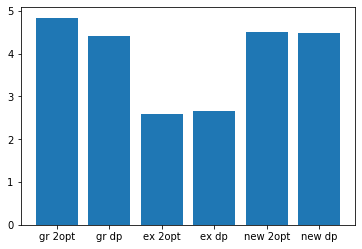

In [40]:
#精度比較
import random
count=0
greedy2opt_error=[]
greedydp_error=[]
exact2opt_error=[]
exactdp_error=[]
new2opt_error=[]
newdp_error=[]
for i in range(len(shugo)):
    V = shugo[i]
    n=len(V)
    opt=dynamic_alpha2[i]
    gr_2opt=improve_all_greedy(two_opt(V))
    gr_dp=improve_all_greedy(dp(V))
    ex_2opt=improve_all_exact(two_opt(V))
    ex_dp=improve_all_exact(dp(V))
    new_2opt=newalgo_twoopt(V)
    new_dp=newalgo_dp(V)
    greedy2opt_error.append(((gr_2opt-opt)/opt)*100)
    greedydp_error.append(((gr_dp-opt)/opt)*100)
    exact2opt_error.append(((ex_2opt-opt)/opt)*100)
    exactdp_error.append(((ex_dp-opt)/opt)*100)
    new2opt_error.append(((new_2opt-opt)/opt)*100)
    newdp_error.append(((new_dp-opt)/opt)*100)
    print(count)
    count=count+1
    
lis=[greedy2opt_error,greedydp_error,exact2opt_error,exactdp_error,new2opt_error,newdp_error]
name=['gr 2opt','gr dp','ex 2opt','ex dp','new 2opt','new dp']
for i in range(len(lis)):
    print(name[i],'max error:{}'.format(max(lis[i])),'average error:{}'.format(sum(lis[i])/len(lis[i])),'number of times outputs the optimal solution:{}/100'.format(lis[i].count(0)))
height=[sum(lis[i])/len(lis[i])for i in range(len(lis))]
plt.bar(name,height)